# Import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import os
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Load Datasets

In [2]:
dataframes = []

for i in range(1, 11):
    file_path = f"data/emotion_data/{i}/emotion.csv"    
    df = pd.read_csv(file_path)  
    df['candidate_id'] = i 
    columns = ['candidate_id'] + [col for col in df.columns if col != 'candidate_id']
    df =df[columns]
    dataframes.append(df)

In [3]:
emotion_combined = pd.concat(dataframes, ignore_index=True)

In [4]:
dataframes = []

for i in range(1, 11):
    file_path = f"data/emotion_data/{i}/gaze.csv"    
    df = pd.read_csv(file_path)
    df['candidate_id'] = i 
    columns = ['candidate_id'] + [col for col in df.columns if col != 'candidate_id']
    df =df[columns]
    dataframes.append(df)

In [5]:
gaze_combined = pd.concat(dataframes, ignore_index=True)

In [6]:
emotion_gaze_combined = pd.merge(emotion_combined, gaze_combined, on=['candidate_id','movie_id', 'image_seq'], how='left')

In [7]:
dataframes = []

for i in range(1, 11):
    file_path = f"data/transcript_data/{i}.csv"    
    df = pd.read_csv(file_path)   
    df['candidate_id'] = i 
    columns = ['candidate_id'] + [col for col in df.columns if col != 'candidate_id']
    df =df[columns]
    dataframes.append(df)

In [8]:
transcripts_combined = pd.concat(dataframes, ignore_index=True)

In [9]:
data = []
folder_path = "data/transcripts/" 

for i in range(1, 11): 
    file_path = os.path.join(folder_path, f"{i}.txt")  
    with open(file_path, 'r') as file:
        transcript_text = file.read() 
        data.append({'candidate_id': i, 'transcript_text': transcript_text})  


transcripts = pd.DataFrame(data)

### General overview of the data 

In [10]:
transcripts_combined.describe()

,candidate_id,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,5.051724,8.804598,3259.954023,42.967356,48.048161,0.0,-0.305174,1.607418,0.312377,0.649040,0.181337,0.169623,0.633645,0.512666,0.402908,0.444451,2.996718
std,2.816687,6.041933,2751.098118,27.410972,27.229853,0.0,0.060732,0.147240,0.268419,0.226489,0.174729,0.100368,0.251203,0.260640,0.228005,0.288260,0.689443
min,1.000000,0.000000,0.000000,0.000000,3.000000,0.0,-0.661634,0.733333,0.003822,0.010479,0.002975,0.004540,0.001164,0.001167,0.006319,0.004134,0.806452
25%,3.000000,4.000000,0.000000,19.270000,24.400000,0.0,-0.331398,1.582979,0.082161,0.520933,0.067987,0.087058,0.482443,0.324376,0.222931,0.210682,2.504496
50%,5.000000,8.000000,2872.000000,42.560000,48.090000,0.0,-0.291910,1.626052,0.233486,0.654415,0.139484,0.171088,0.700413,0.550926,0.377299,0.386062,2.971163
75%,7.000000,13.000000,5440.000000,63.930000,69.520000,0.0,-0.268956,1.667732,0.543254,0.841149,0.242137,0.240698,0.821050,0.717926,0.575076,0.661921,3.440734
max,10.000000,27.000000,8692.000000,97.840000,98.920000,0.0,-0.196253,1.789298,0.910383,0.992485,0.971378,0.498208,0.993897,0.994522,0.961038,0.998064,4.945055


In [11]:
emotion_gaze_combined.describe()

,candidate_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,gaze,blink,eye_offset
count,747.000000,747.000000,747.000000,7.470000e+02,747.000000,7.470000e+02,747.000000,7.470000e+02,7.470000e+02,729.000000,729.000000,729.000000
mean,5.472557,44.631861,6.223748,1.586366e-01,19.003329,1.187686e+01,12.636010,5.490173e+00,4.461124e+01,0.736626,0.097394,14.383516
std,3.135071,27.270607,13.007503,1.101350e+00,25.615108,2.411922e+01,20.387900,1.537337e+01,3.966181e+01,0.440766,0.296697,19.331426
min,1.000000,0.000000,0.000015,1.680020e-14,0.000002,1.959540e-09,0.000022,4.278190e-07,7.548270e-07,0.000000,0.000000,-35.804300
25%,3.000000,21.000000,0.193459,1.355525e-06,0.687261,8.623350e-02,0.448145,1.265175e-02,4.210900e+00,0.000000,0.000000,0.937600
50%,5.000000,44.000000,1.308920,1.866540e-04,5.731700,8.230810e-01,2.619840,2.016130e-01,3.377610e+01,1.000000,0.000000,8.793200
75%,8.000000,68.000000,5.617910,1.171565e-02,30.086950,8.921020e+00,13.845600,2.054355e+00,8.916495e+01,1.000000,0.000000,25.573700
max,10.000000,99.000000,95.056300,2.150890e+01,99.750200,9.998180e+01,98.333400,9.976910e+01,9.999140e+01,1.000000,1.000000,91.234700


### Check for null values 

In [12]:
emotion_gaze_combined.isnull().sum()

candidate_id         0
movie_id             0
image_seq            0
angry                0
disgust              0
fear                 0
happy                0
sad                  0
surprise             0
neutral              0
dominant_emotion     0
gaze                18
blink               18
eye_offset          18
dtype: int64

In [13]:
transcripts_combined.isnull().sum()

candidate_id         0
id                   0
seek                 0
start                0
end                  0
text                 0
tokens               0
temperature          0
avg_logprob          0
compression_ratio    0
no_speech_prob       0
positive             0
negative             0
neutral              0
confident            0
hesitant             0
concise              0
enthusiastic         0
speech_speed         0
dtype: int64

In [14]:
transcripts.isnull().sum()

candidate_id       0
transcript_text    0
dtype: int64

# Calculate positive communication score and negative communication score

In [15]:
positive_columns = ['positive', 'confident', 'concise', 'enthusiastic']
negative_columns = ['negative', 'hesitant']

# Function to calculate communication scores for each candidate
def calculate_communication_scores(df):
        
    # Group by candidate_id and calculate mean scores for positive and negative traits
    positive_scores = df.groupby('candidate_id')[positive_columns].mean()
    negative_scores = df.groupby('candidate_id')[negative_columns].mean()

    # Sum the positive and negative scores to get total positive and negative communication skills
    positive_communication = positive_scores.mean(axis=1)
    negative_communication = negative_scores.mean(axis=1)
    
    # Calculate overall communication score by subtracting negative from positive
    overall_communication = positive_communication - negative_communication

    # Return the resulting DataFrame with all the scores
    result = pd.DataFrame({
        'positive_communication': positive_communication,
        'negative_communication': negative_communication,
        'overall_communication': overall_communication
    })

    return result

# Apply the function to the dataset (either transcripts_combined or emotion_gaze_combined)
communication_scores = calculate_communication_scores(transcripts_combined)

# Display the communication scores for each candidate
print(communication_scores)


              positive_communication  negative_communication  \
candidate_id                                                   
1                           0.584736                0.313193   
2                           0.601948                0.271849   
3                           0.495897                0.434171   
4                           0.530398                0.369797   
5                           0.503105                0.324250   
6                           0.560041                0.314622   
7                           0.570894                0.298651   
8                           0.487456                0.349957   
9                           0.524039                0.381340   
10                          0.480070                0.370792   

              overall_communication  
candidate_id                         
1                          0.271542  
2                          0.330098  
3                          0.061726  
4                          0.160602  
5  

### Plot positive and negative communication scores of the candidates

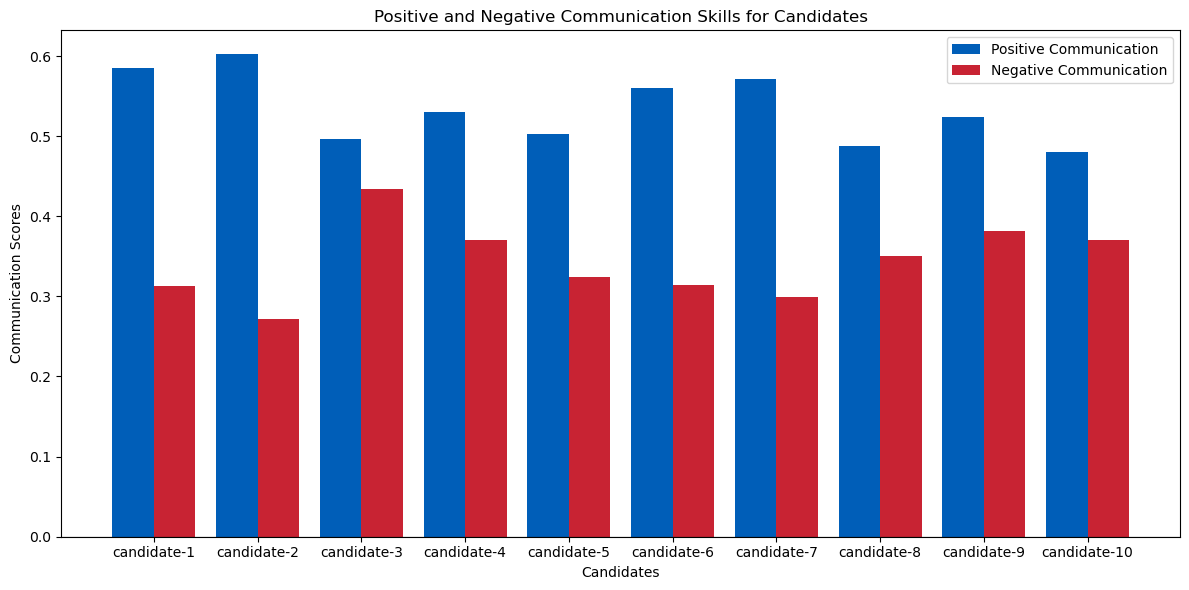

In [16]:
communication_scores['candidate_label'] = ['candidate-' + str(i + 1) for i in range(len(communication_scores))]

# Set up the figure for the combined plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar width
bar_width = 0.4
index = range(len(communication_scores))

# Define the same colors for positive and negative communication skills
positive_color = '#005EB8'  # Dark blue
negative_color = '#C82333'  # Dark red

# Plot positive communication scores
bars_pos = ax.bar([i - bar_width / 2 for i in index], communication_scores['positive_communication'], width=bar_width, color=positive_color, label='Positive Communication')

# Plot negative communication scores
bars_neg = ax.bar([i + bar_width / 2 for i in index], communication_scores['negative_communication'], width=bar_width, color=negative_color, label='Negative Communication')

# Add labels and title
ax.set_xlabel('Candidates')
ax.set_ylabel('Communication Scores')
ax.set_title('Positive and Negative Communication Skills for Candidates')

# Set x-ticks to the center position of the bars and add candidate labels
ax.set_xticks(index)
ax.set_xticklabels(communication_scores['candidate_label'], rotation=0)  # Display candidate labels

# Add a horizontal line at zero
ax.axhline(0, color='black', linewidth=0.8)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('negative_and_positive_communication_score_per_candidate_side_by_side_with_labels.png', dpi=300)
plt.show()

### Plot overall communication scores of the candidates

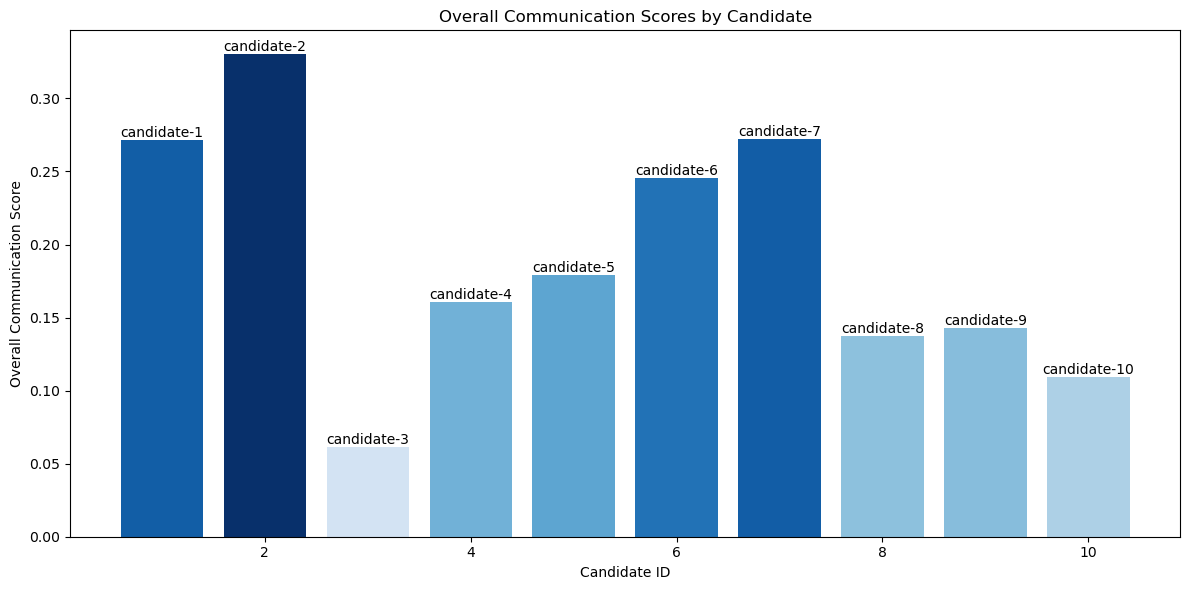

In [17]:
plt.figure(figsize=(12, 6))

# Create colors based on the overall communication score (Red for negative, Blue for positive)
colors = [
    plt.cm.Reds(np.abs(score) / max(communication_scores['overall_communication'].abs())) if score < 0
    else plt.cm.Blues(np.abs(score) / max(communication_scores['overall_communication'].abs()))
    for score in communication_scores['overall_communication']
]

# Create barplot for overall communication scores
bars = plt.bar(communication_scores.index, communication_scores['overall_communication'], color=colors)

# Annotate each bar with "candidate-1", "candidate-2", etc.
for bar, idx in zip(bars, range(len(communication_scores))):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'candidate-{idx + 1}', ha='center', va='bottom' if yval > 0 else 'top')

# Add labels and title
plt.title('Overall Communication Scores by Candidate')
plt.ylabel('Overall Communication Score')
plt.xlabel('Candidate ID')

# Save the plot as an image (PNG)
plt.tight_layout()
plt.savefig('overall_communication_scores_with_annotation.png', dpi=300)
# Show the plot
plt.show()

# calculate positive and negative emotions scores

In [18]:
positive_emotions = ['happy', 'surprise']
negative_emotions = ['angry', 'disgust', 'fear', 'sad']

# Initialize dictionaries to store scores for each candidate
positive_emotion_scores = {}
negative_emotion_scores = {}

# Loop through each candidate to calculate average positive and negative emotions
for candidate_id in emotion_gaze_combined['candidate_id'].unique():
    # Filter the data for the current candidate
    candidate_data = emotion_gaze_combined[emotion_gaze_combined['candidate_id'] == candidate_id]
    
    # Calculate average positive emotion score
    positive_emotion_scores[candidate_id] = candidate_data[positive_emotions].mean(axis=1).mean()
    
    # Calculate average negative emotion score
    negative_emotion_scores[candidate_id] = candidate_data[negative_emotions].mean(axis=1).mean()

# Convert dictionaries to DataFrame for easier handling
emotion_scores = pd.DataFrame({
    'candidate_id': list(positive_emotion_scores.keys()),
    'positive_emotion_score': list(positive_emotion_scores.values()),
    'negative_emotion_score': list(negative_emotion_scores.values())
})

# Calculate overall emotion score (positive - negative)
emotion_scores['overall_emotion_score'] = emotion_scores['positive_emotion_score'] - emotion_scores['negative_emotion_score']

# Print the final emotion scores
print("Emotion Scores for Each Candidate:")
print(emotion_scores)

Emotion Scores for Each Candidate:
   candidate_id  positive_emotion_score  negative_emotion_score  \
0             1                7.305144               11.756519   
1             2               18.665309                9.023196   
2             3               14.348574                8.365531   
3             4                0.988176                1.348677   
4             5                0.054742                1.779666   
5             6               11.184182                0.119029   
6             7                6.537577               17.637687   
7             8                2.011081                5.505258   
8             9               16.247646                7.343259   
9            10                4.273082               18.176403   

   overall_emotion_score  
0              -4.451376  
1               9.642113  
2               5.983043  
3              -0.360501  
4              -1.724924  
5              11.065154  
6             -11.100110  
7          

### Plot overall emotion scores of the candidates

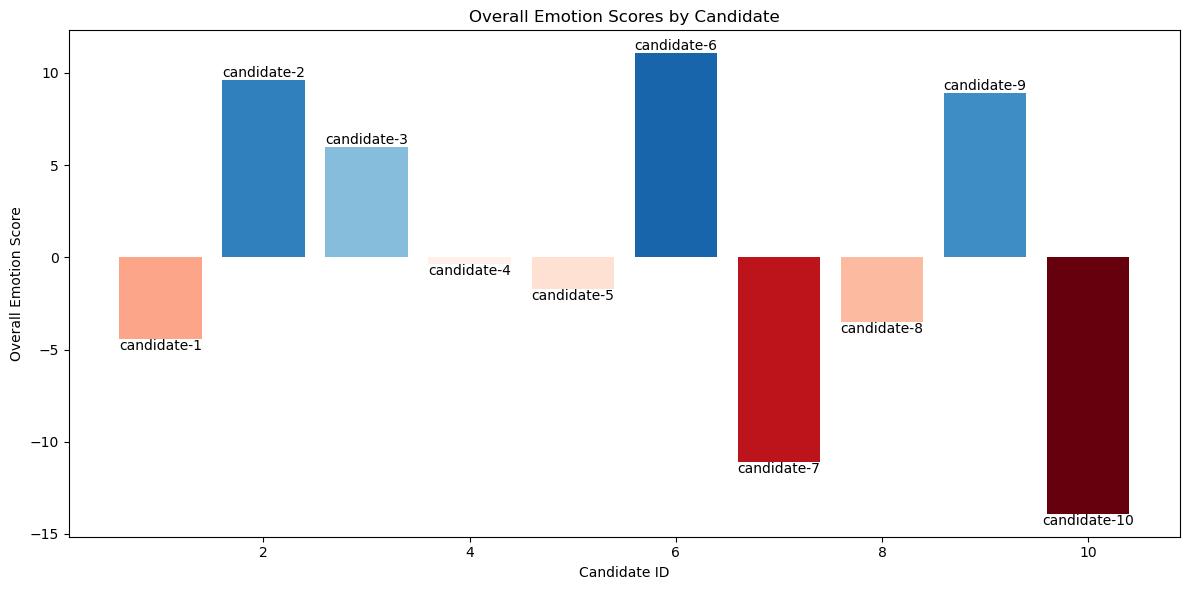

In [19]:
positive_emotions = ['happy', 'surprise']
negative_emotions = ['angry', 'disgust', 'fear', 'sad']

# Initialize dictionaries to store scores for each candidate
positive_emotion_scores = {}
negative_emotion_scores = {}

# Loop through each candidate to calculate average positive and negative emotions
for candidate_id in emotion_gaze_combined['candidate_id'].unique():
    # Filter the data for the current candidate
    candidate_data = emotion_gaze_combined[emotion_gaze_combined['candidate_id'] == candidate_id]
    
    # Calculate average positive emotion score
    positive_emotion_scores[candidate_id] = candidate_data[positive_emotions].mean(axis=1).mean()
    
    # Calculate average negative emotion score
    negative_emotion_scores[candidate_id] = candidate_data[negative_emotions].mean(axis=1).mean()

# Convert dictionaries to DataFrame for easier handling
emotion_scores = pd.DataFrame({
    'candidate_id': list(positive_emotion_scores.keys()),
    'positive_emotion_score': list(positive_emotion_scores.values()),
    'negative_emotion_score': list(negative_emotion_scores.values())
})

# Calculate overall emotion score (positive - negative)
emotion_scores['overall_emotion_score'] = emotion_scores['positive_emotion_score'] - emotion_scores['negative_emotion_score']

# Plotting positive, negative, and overall emotion scores for each candidate
plt.figure(figsize=(12, 6))

# Create colors based on the overall emotion score (Red for negative, Blue for positive)
colors = [
    plt.cm.Reds(np.abs(score) / max(emotion_scores['overall_emotion_score'].abs())) if score < 0
    else plt.cm.Blues(np.abs(score) / max(emotion_scores['overall_emotion_score'].abs()))
    for score in emotion_scores['overall_emotion_score']
]

# Create barplot
bars = plt.bar(emotion_scores['candidate_id'], emotion_scores['overall_emotion_score'], color=colors)

# Annotate each bar with "candidate-1", "candidate-2", etc.
for bar, idx in zip(bars, range(len(emotion_scores))):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'candidate-{idx + 1}', ha='center', va='bottom' if yval > 0 else 'top')

# Add labels and title
plt.title('Overall Emotion Scores by Candidate')
plt.ylabel('Overall Emotion Score')
plt.xlabel('Candidate ID')

# Save the plot as an image (PNG)
plt.tight_layout()
# plt.savefig('overall_emotion_scores_with_annotation.png', dpi=300)
# Show the plot
plt.show()

### Plot positive and negative emotion scores of the candidates

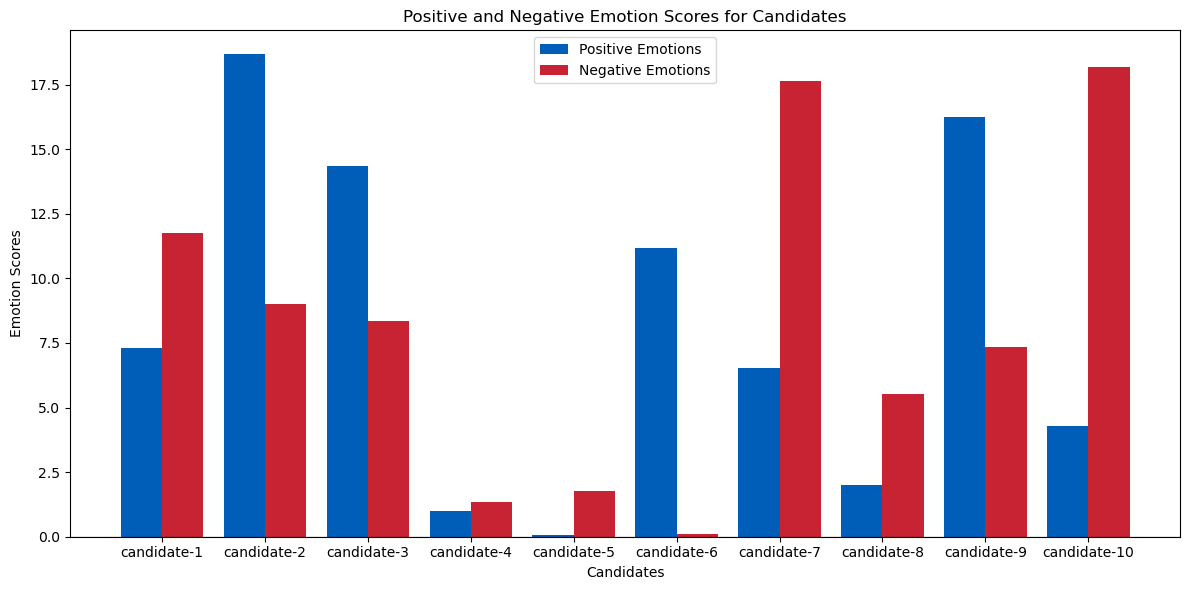

In [20]:
positive_emotions = ['happy', 'surprise']
negative_emotions = ['angry', 'disgust', 'fear', 'sad']

# Initialize dictionaries to store scores for each candidate
positive_emotion_scores = {}
negative_emotion_scores = {}

# Loop through each candidate to calculate average positive and negative emotions
for candidate_id in emotion_gaze_combined['candidate_id'].unique():
    # Filter the data for the current candidate
    candidate_data = emotion_gaze_combined[emotion_gaze_combined['candidate_id'] == candidate_id]
    
    # Calculate average positive emotion score
    positive_emotion_scores[candidate_id] = candidate_data[positive_emotions].mean(axis=1).mean()
    
    # Calculate average negative emotion score
    negative_emotion_scores[candidate_id] = candidate_data[negative_emotions].mean(axis=1).mean()

# Convert dictionaries to DataFrame for easier handling
emotion_scores = pd.DataFrame({
    'candidate_id': list(positive_emotion_scores.keys()),
    'positive_emotion_score': list(positive_emotion_scores.values()),
    'negative_emotion_score': list(negative_emotion_scores.values())
})

# Create new labels "candidate-1", "candidate-2", ...
emotion_scores['candidate_label'] = ['candidate-' + str(i + 1) for i in range(len(emotion_scores))]

# Set up the figure for the combined plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar width
bar_width = 0.4
index = range(len(emotion_scores))

# Define darker colors for positive and negative emotions
positive_color = '#005EB8'  # Dark blue
negative_color = '#C82333'  # Dark red

# Plot positive emotion scores
bars_pos = ax.bar([i - bar_width / 2 for i in index], emotion_scores['positive_emotion_score'], width=bar_width, color=positive_color, label='Positive Emotions')

# Plot negative emotion scores
bars_neg = ax.bar([i + bar_width / 2 for i in index], emotion_scores['negative_emotion_score'], width=bar_width, color=negative_color, label='Negative Emotions')

# Add labels and title
ax.set_xlabel('Candidates')
ax.set_ylabel('Emotion Scores')
ax.set_title('Positive and Negative Emotion Scores for Candidates')

# Set x-ticks to the center position of the bars and add candidate labels
ax.set_xticks(index)
ax.set_xticklabels(emotion_scores['candidate_label'], rotation=0)  # Display candidate labels

# Add a horizontal line at zero
ax.axhline(0, color='black', linewidth=0.8)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('negative_and_positive_emotion_score_per_candidate_side_by_side_with_labels.png', dpi=300)
plt.show()

### Plot change in emotions of the candidates with time (image_seq).

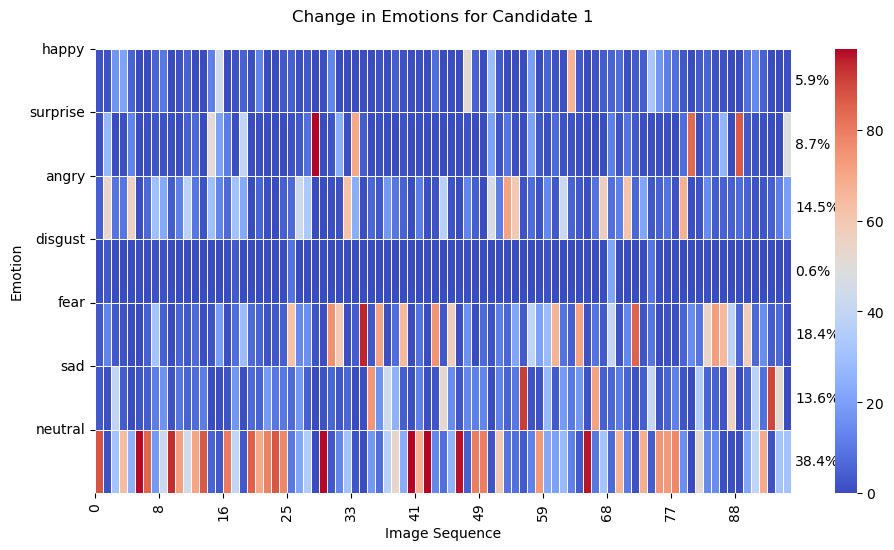

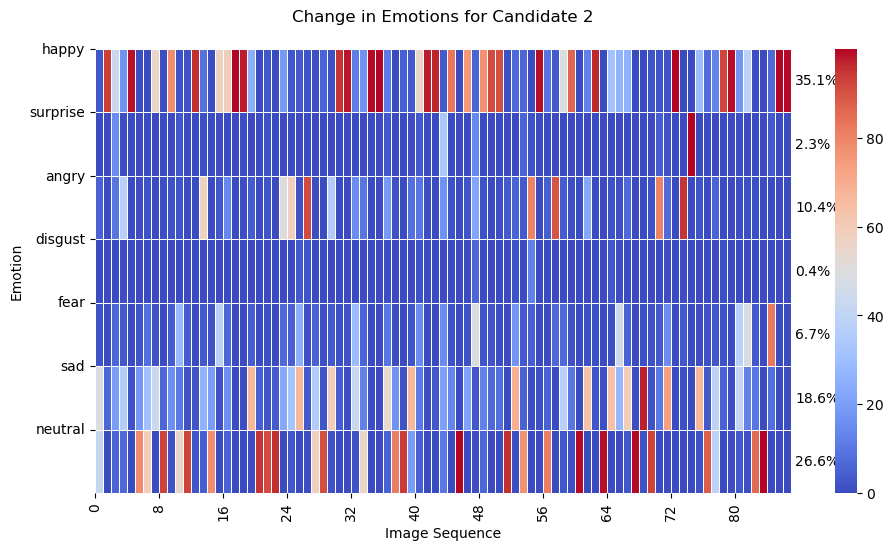

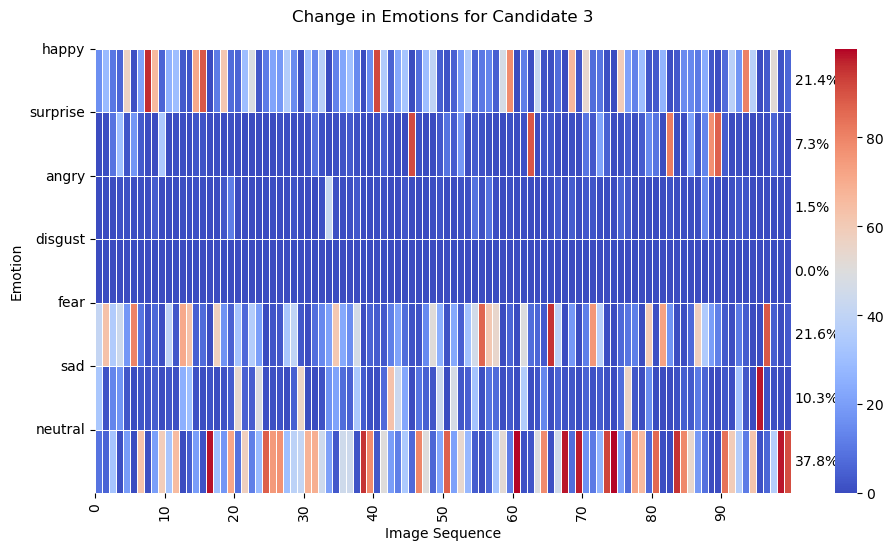

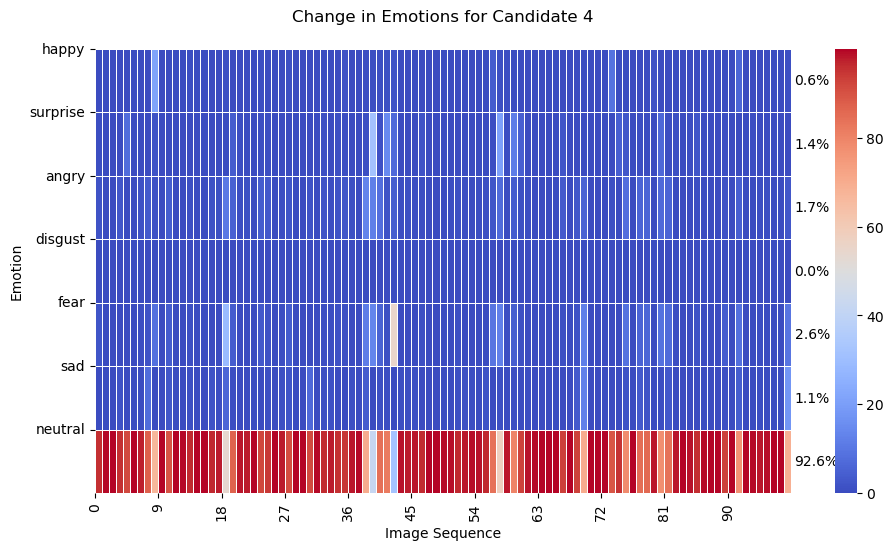

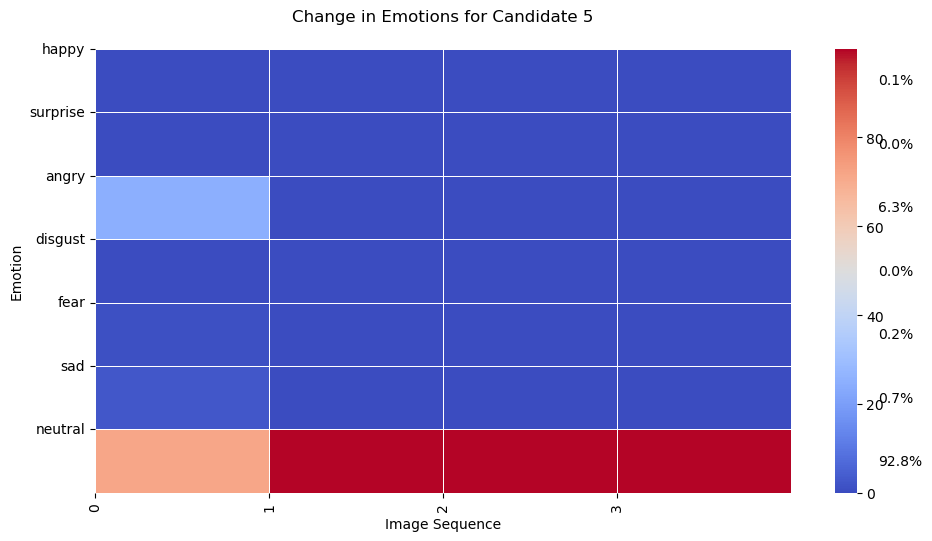

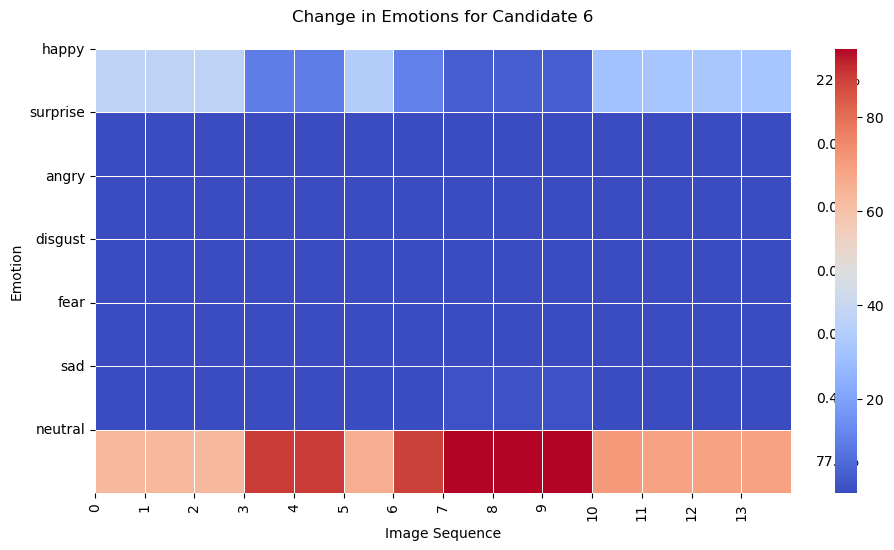

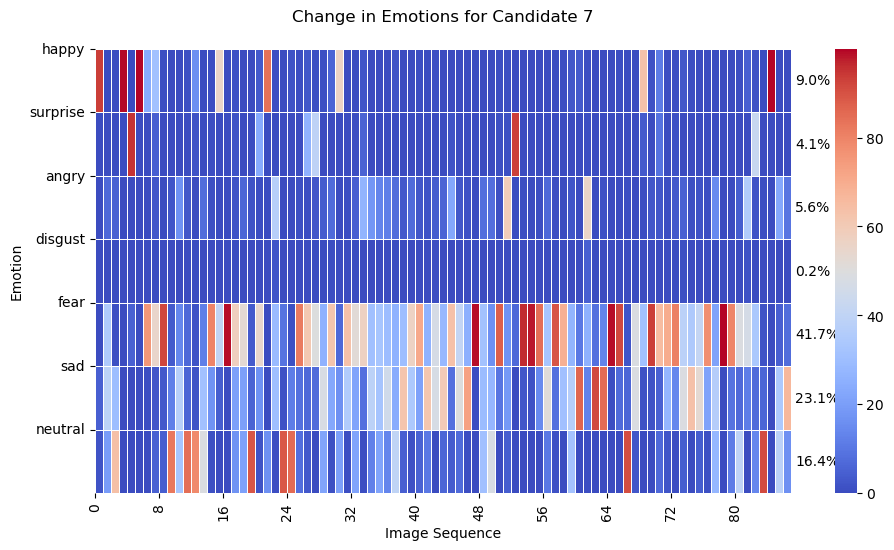

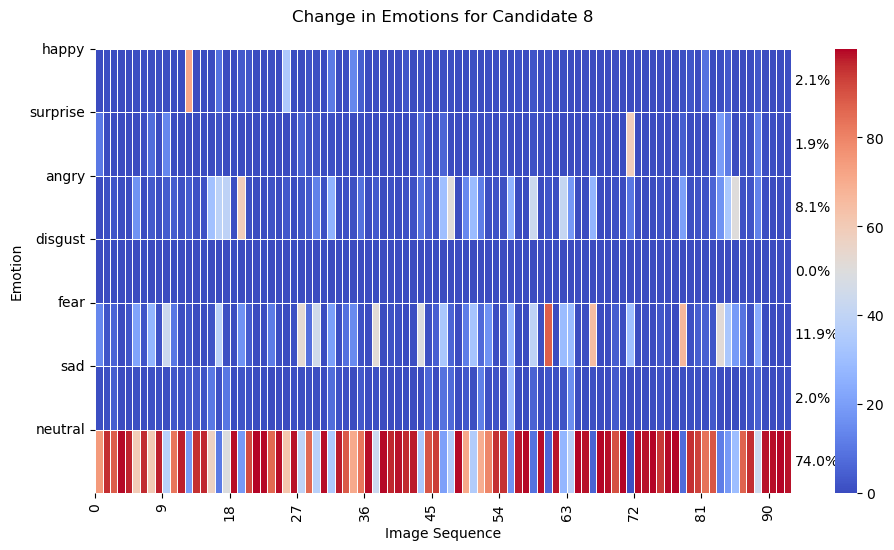

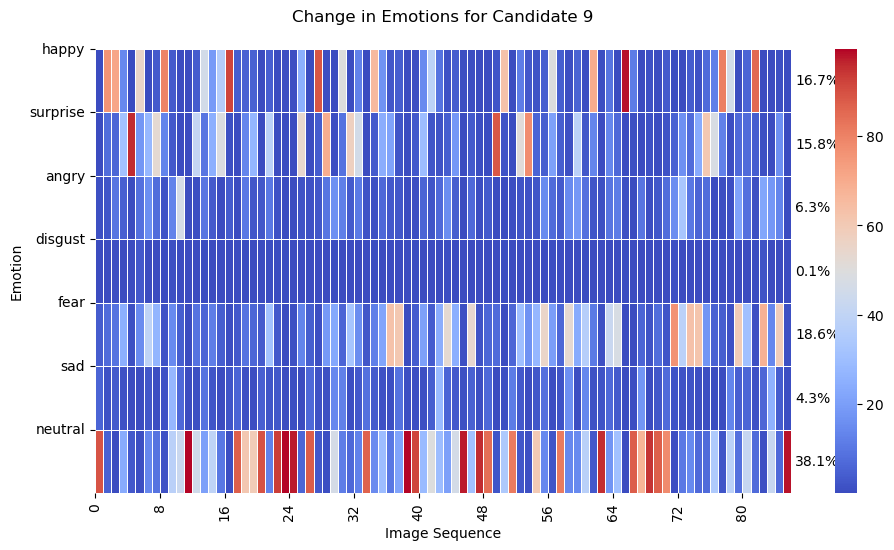

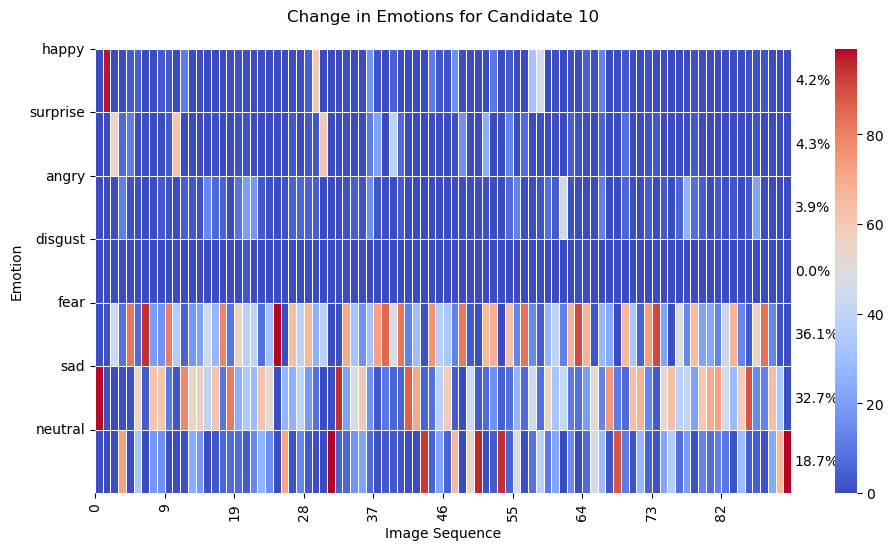

In [21]:
emotion_columns = ['happy', 'surprise', 'angry', 'disgust', 'fear', 'sad', 'neutral']

# Loop through each candidate in the dataset
for candidate_id in emotion_gaze_combined['candidate_id'].unique():
    # Filter data for the current candidate
    candidate_data = emotion_gaze_combined[emotion_gaze_combined['candidate_id'] == candidate_id]

    # Calculate the percentage of each emotion
    emotion_counts = candidate_data[emotion_columns].sum()  # Sum of emotions
    total_counts = emotion_counts.sum()  # Total counts of emotions
    emotion_percentage = (emotion_counts / total_counts) * 100  # Calculate percentage

    # Create a heatmap for the candidate's emotions over image sequence
    plt.figure(figsize=(12, 6))
    
    # Transpose the data to have emotions on the y-axis
    heatmap_data = candidate_data[emotion_columns].T
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar=True, linewidths=0.5)

    # Set the x-ticks to match the image_seq values but reduce to every nth value for readability
    n = max(1, len(candidate_data) // 10)  # Display 1 out of n ticks
    plt.xticks(ticks=range(0, len(candidate_data), n), 
               labels=candidate_data['image_seq'].values[::n], rotation=90)

    # Title and labels
    plt.title(f'Change in Emotions for Candidate {candidate_id}', pad=20)  # Increased padding
    plt.xlabel('Image Sequence')
    plt.ylabel('Emotion')

    # Set the y-ticks to be the emotion names without repeating on every emotion
    plt.yticks(ticks=range(len(emotion_columns)), labels=emotion_columns, rotation=0)

    # Annotate the percentage outside the plot area to the right of the heatmap
    for idx, percentage in enumerate(emotion_percentage):
        plt.text(len(candidate_data) + 0.5, idx + 0.5, f'{percentage:.1f}%', 
                 ha='left', va='center', fontsize=10, color='black')

    # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.85, right=0.85)  # Adjust the right margin to fit percentages
    
    # Save the plot as an image (PNG) with a unique filename for each candidate
    plt.savefig(f'candidate_{candidate_id}_emotion_changes_with_percentage_outside.png', dpi=300)
    
    # Show the plot
    plt.show()

### correlation between emotions 

             happy  surprise     angry   disgust      fear       sad   neutral
happy     1.000000 -0.072263 -0.125228 -0.004104 -0.178267 -0.136097 -0.353837
surprise -0.072263  1.000000  0.007399  0.002893  0.036954 -0.176636 -0.279242
angry    -0.125228  0.007399  1.000000  0.193036 -0.002004  0.020198 -0.269123
disgust  -0.004104  0.002893  0.193036  1.000000  0.052634  0.024602 -0.136343
fear     -0.178267  0.036954 -0.002004  0.052634  1.000000  0.056354 -0.581526
sad      -0.136097 -0.176636  0.020198  0.024602  0.056354  1.000000 -0.406517
neutral  -0.353837 -0.279242 -0.269123 -0.136343 -0.581526 -0.406517  1.000000


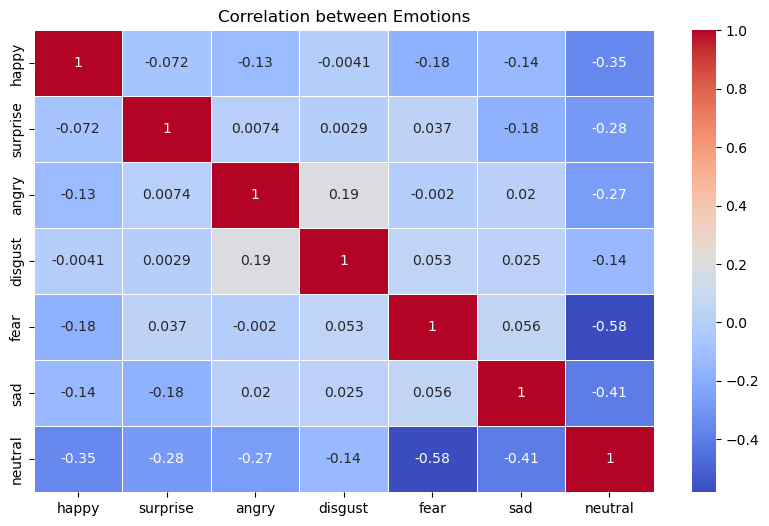

In [22]:
emotion_columns = ['happy', 'surprise', 'angry', 'disgust', 'fear', 'sad', 'neutral']

# Calculate the correlation matrix
correlation_matrix = emotion_gaze_combined[emotion_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.savefig('emotions_correlation.png', dpi=300)
plt.title('Correlation between Emotions')
plt.show()

### calculating and ploting dominant emotion

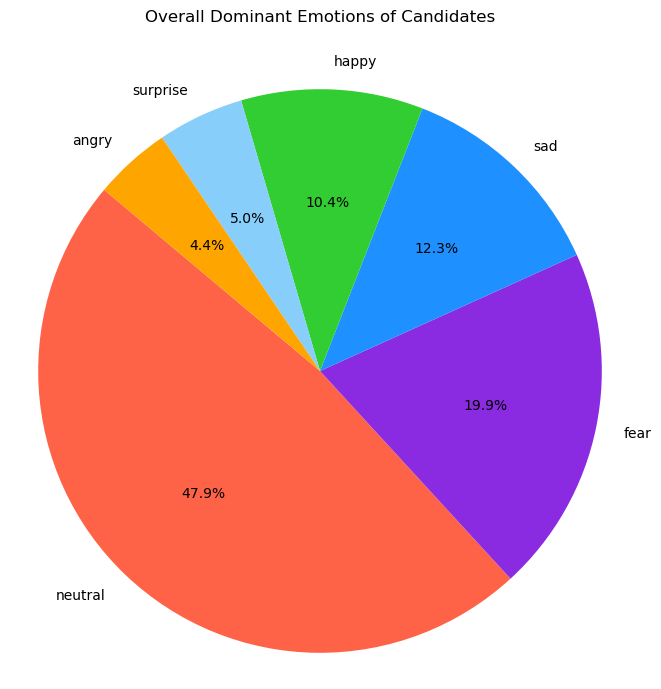

In [23]:
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Create a new column to hold the dominant emotion for each row
def get_dominant_emotion(row):
    return row[emotion_columns].idxmax()  # Returns the column name of the max score

# Apply the function to get the dominant emotion for each row
emotion_gaze_combined['dominant_emotion'] = emotion_gaze_combined.apply(get_dominant_emotion, axis=1)

# Calculate the overall dominant emotion for each candidate
dominant_emotion_over_time = emotion_gaze_combined['dominant_emotion'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_over_time, labels=dominant_emotion_over_time.index, autopct='%1.1f%%', startangle=140,
        colors=['#FF6347', '#8A2BE2', '#1E90FF', '#32CD32', '#87CEFA', '#FFA500', '#A9A9A9'])
plt.title('Overall Dominant Emotions of Candidates', pad=30)  # Add padding to the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('overall_dominant_emotions_of_candidates.png', dpi=300)

# Show the plot
plt.show()

# calculate gaze related parameters 

### percentage of time looking at camera per candidate 

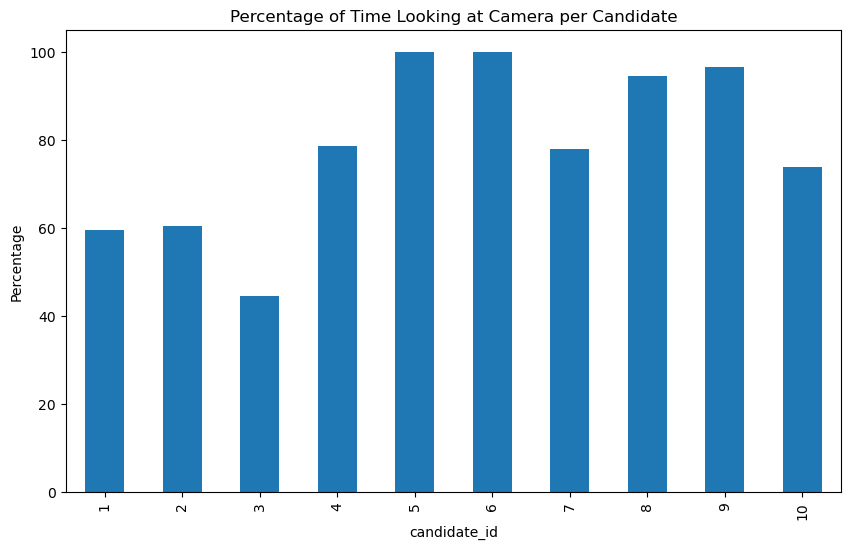

In [24]:
gaze_distribution = emotion_gaze_combined.groupby('candidate_id')['gaze'].mean() * 100

# Plot gaze distribution for each candidate
gaze_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of Time Looking at Camera per Candidate')
plt.ylabel('Percentage')
plt.show()

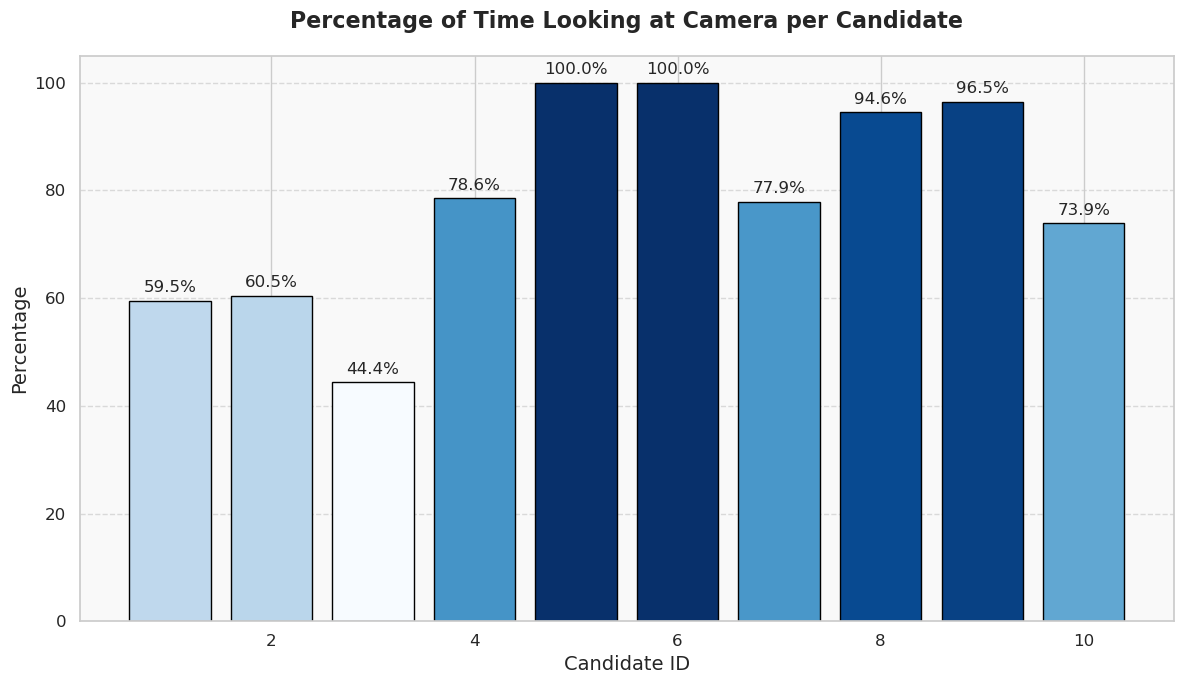

In [25]:
sns.set(style="whitegrid")

# Normalize the values for the gradient color
norm = plt.Normalize(gaze_distribution.min(), gaze_distribution.max())
colors = plt.cm.Blues(norm(gaze_distribution.values))

# Create the figure and axis objects
plt.figure(figsize=(12, 7))

# Plot the data with gradient colors
bars = plt.bar(gaze_distribution.index, gaze_distribution.values, color=colors, edgecolor='black')

# Add labels to each bar with a percentage
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

# Customize the plot further
plt.title('Percentage of Time Looking at Camera per Candidate', fontsize=16, weight='bold', pad=20)
plt.xlabel('Candidate ID', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to make it easier to read the chart
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a clean background
plt.gca().set_facecolor('#f9f9f9')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('percentage_of_time_looking_at_camera_per_candidate.png', dpi=300)

plt.show()

### gaze vs different emotions 

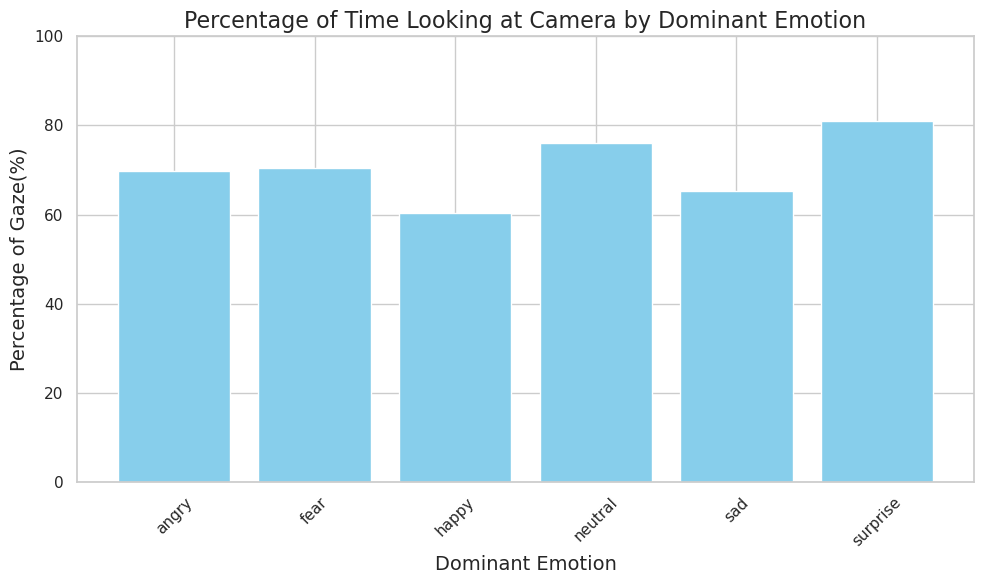

In [26]:
gaze_percentage = (
    emotion_gaze_combined.groupby('dominant_emotion')['gaze']
    .agg(lambda x: (x == 1).mean() * 100)  # Calculate percentage of gaze == 1
    .reset_index()
)

# Rename columns for clarity
gaze_percentage.columns = ['Dominant Emotion', 'Percentage of Gaze = 1']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(gaze_percentage['Dominant Emotion'], gaze_percentage['Percentage of Gaze = 1'], color='skyblue')

# Adding titles and labels
plt.title('Percentage of Time Looking at Camera by Dominant Emotion', fontsize=16)
plt.ylabel('Percentage of Gaze(%)', fontsize=14)
plt.xlabel('Dominant Emotion', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%

# Show the plot
plt.tight_layout()
plt.savefig('percentage_of_time_looking_at_camera_by_dominant_emotion.png', dpi=300)

plt.show()

# extract key skills and area of interest

<Figure size 1200x600 with 0 Axes>

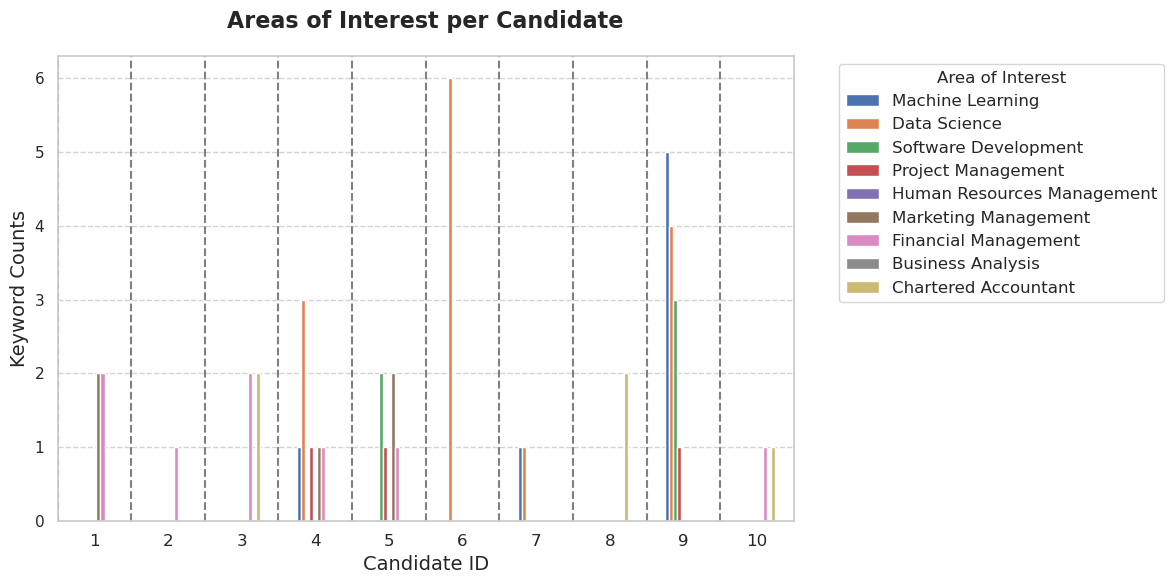

In [27]:
areas_of_interest = {
    'Machine Learning': ['machine learning', 'deep learning', 'artificial intelligence', 'neural networks', 'supervised learning', 'unsupervised learning', 'reinforcement learning', 'model training'],
    'Data Science': ['data science', 'data analysis', 'analytics', 'data mining', 'statistical analysis', 'big data', 'data visualization', 'data wrangling', 'python', 'sql', 'artificial intelligence'],
    'Software Development': ['software development', 'programming', 'coding', 'development', 'software engineering', 'web development', 'full-stack', 'front-end', 'back-end', 'agile', 'devops'],
    'Project Management': ['project management', 'agile', 'scrum', 'project', 'stakeholder management', 'risk management', 'time management', 'resource allocation', 'project planning', 'kanban'],
    'Human Resources Management': ['human resources', 'talent acquisition', 'recruitment', 'employee engagement', 'hr policies', 'performance management', 'succession planning', 'training and development', 'labor laws'],
    'Marketing Management': ['management','marketing management', 'brand management', 'digital marketing', 'advertising', 'seo', 'content marketing', 'market research', 'customer segmentation', 'campaign management', 'social media marketing'],
    'Financial Management': ['management','financial management', 'corporate finance', 'financial planning','accounting', 'budgeting', 'forecasting', 'investment management', 'cost accounting', 'risk management', 'financial analysis', 'investment'],
    'Business Analysis': ['business analysis', 'requirements gathering', 'stakeholder engagement', 'business process modeling', 'swot analysis', 'business intelligence', 'data-driven decisions'],
    'Chartered Accountant': ['chartered accountant', 'cfa' ,'accounting', 'financial auditing', 'taxation', 'financial reporting', 'gst', 'indirect tax', 'direct tax', 'accounting standards', 'balance sheet', 'income statement', 'cash flow statement', 'financial statements']

}

# Initialize a list to store area of interest counts
aois_data = []

# Loop through each candidate's transcript
for index, row in transcripts.iterrows():
    candidate_id = row['candidate_id']
    transcript = row['transcript_text']
    
    # Initialize a dictionary to hold counts for each area of interest
    counts = {area: 0 for area in areas_of_interest.keys()}
    
    # Count keywords for each area of interest
    for area, keywords in areas_of_interest.items():
        for keyword in keywords:
            counts[area] += transcript.lower().count(keyword)
    
    # Add candidate_id to counts and append to the data list
    counts['candidate_id'] = candidate_id
    aois_data.append(counts)

# Create a DataFrame from the collected data
aois_df = pd.DataFrame(aois_data)

# Set candidate_id as index for easier visualization
aois_df.set_index('candidate_id', inplace=True)

# Plotting the areas of interest for each candidate
plt.figure(figsize=(12, 6))
ax = aois_df.plot(kind='bar', stacked=False, figsize=(12, 6), grid=False)

# Customize the plot
plt.title('Areas of Interest per Candidate', fontsize=16, weight='bold', pad=20)
plt.ylabel('Keyword Counts', fontsize=14)
plt.xlabel('Candidate ID', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Area of Interest', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Get candidate boundaries and draw darker vertical lines
boundaries = range(len(aois_df))
for boundary in boundaries:
    ax.axvline(x=boundary - 0.5, color='gray', linestyle='--', lw=1.5)

# Add a vertical grid only for major candidate boundaries
plt.grid(True, axis='y', linestyle='--', color='lightgray')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('area_of_interest_per_candidate_with_boundaries.png', dpi=300)
plt.show()